In [1]:
## read demographic data and freesurfer outputs
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pandas as pd
import numpy as np
%matplotlib inline
#reading freesurfer results
out_dir = Path("/output")
fig_dir = out_dir / "figs"
fsdata_file = out_dir / 'freesurfer_out_preped.csv'
tab_data = pd.read_csv(fsdata_file, sep=',', header=0, index_col=0);
def lr_ratio(data, items_basic, items_single, items_lr):
    item_left   = [ "Left_"+x  for x in items_lr];
    item_right  = [ "Right_"+x for x in items_lr];
    items_all = items_single + item_left + item_right + items_lr;
    tmp_data = data[items_basic+items_single+item_left+item_right];
    for x in items_lr:
        tmp_data[x]  = tmp_data["Left_"+x] + tmp_data["Right_"+x]
    #for x in items_all:
    #    tmp_data[x+"_r"] = tmp_data[x]/tmp_data["eTIV"]  
    return tmp_data, items_basic+items_all

# plot distribution of brian tissues
   
#dist_plot(tmp_data, x_focus, "age-distr")
from sklearn import linear_model
import numpy as np
items_basic = ["diagnosis", "age", "sex", "is_PD", "is_ET","is_NC",
               "is_Male", "is_Female", "eTIV", "TotalGrayVol",];
items_single = ["CortexVol", "Brain-Stem", "SubCortGrayVol", "CSF"];
items_lr  = ["Cerebellum_Cortex", "Cerebellum_White_Matter"];

items_basic = ["diagnosis", "age", "sex", "is_PD", "is_ET","is_NC",
               "is_Male", "is_Female", "eTIV", "TotalGrayVol",];
items_single = ["CerebralWhiteMatterVol", "CortexVol", "Brain_Stem", "SubCortGrayVol", "CSF", 
                "3rd_Ventricle", "4th_Ventricle", "5th_Ventricle", "SupraTentorialVol", 
                "CC_Anterior", "CC_Central", "CC_Mid_Anterior", "CC_Mid_Posterior", "CC_Posterior"];
items_lr  = ["Inf_Lat_Vent", "Lateral_Ventricle", 
             "Cerebellum_Cortex", "Cerebellum_White_Matter", "WM_hypointensities", 
             "Accumbens_area", "Amygdala", "Hippocampus", 
             "Pallidum", "Caudate", "Putamen", "Thalamus_Proper"];

tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
tmp_data=tmp_data.drop(index='sub_0064');
tmp_data['sub_id']=tmp_data.index
print(tmp_data.columns)

201127-12:47:06,550 nipype.utils WARNING:
	 A newer version (1.5.1) of nipy/nipype is available. You are using 1.5.0



Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Index(['diagnosis', 'age', 'sex', 'is_PD', 'is_ET', 'is_NC', 'is_Male',
       'is_Female', 'eTIV', 'TotalGrayVol', 'CerebralWhiteMatterVol',
       'CortexVol', 'Brain_Stem', 'SubCortGrayVol', 'CSF', '3rd_Ventricle',
       '4th_Ventricle', '5th_Ventricle', 'SupraTentorialVol', 'CC_Anterior',
       'CC_Central', 'CC_Mid_Anterior', 'CC_Mid_Posterior', 'CC_Posterior',
       'Left_Inf_Lat_Vent', 'Left_Lateral_Ventricle', 'Left_Cerebellum_Cortex',
       'Left_Cerebellum_White_Matter', 'Left_WM_hypointensities',
       'Left_Accumbens_area', 'Left_Amygdala', 'Left_Hippocampus',
       'Left_Pallidum', 'Left_Caudate', 'Left_Putamen', 'Left_Thalamus_Proper',
       'Right_Inf_Lat_Vent', 'Right_Lateral_Ventricle',
       'Right_Cerebellum_Cortex', 'Right_Cerebellum_White_Matter',
       'Right_WM_hypointensities', 'Right_Accumbens_area', 'Right_Amygdala',
       'Right_Hippocampus', 'Right_Pallidum', 'Right_Caudate', 'Right_Putamen',
       'Right_Thalamus_Proper', 'Inf_Lat_Vent', 'Lateral

Index(['diagnosis', 'age', 'sex', 'is_PD', 'is_ET', 'is_NC', 'is_Male',
       'is_Female', 'eTIV', 'TotalGrayVol', 'CerebralWhiteMatterVol',
       'CortexVol', 'Brain_Stem', 'SubCortGrayVol', 'CSF', '3rd_Ventricle',
       '4th_Ventricle', '5th_Ventricle', 'SupraTentorialVol', 'CC_Anterior',
       'CC_Central', 'CC_Mid_Anterior', 'CC_Mid_Posterior', 'CC_Posterior',
       'Left_Inf_Lat_Vent', 'Left_Lateral_Ventricle', 'Left_Cerebellum_Cortex',
       'Left_Cerebellum_White_Matter', 'Left_WM_hypointensities',
       'Left_Accumbens_area', 'Left_Amygdala', 'Left_Hippocampus',
       'Left_Pallidum', 'Left_Caudate', 'Left_Putamen', 'Left_Thalamus_Proper',
       'Right_Inf_Lat_Vent', 'Right_Lateral_Ventricle',
       'Right_Cerebellum_Cortex', 'Right_Cerebellum_White_Matter',
       'Right_WM_hypointensities', 'Right_Accumbens_area', 'Right_Amygdala',
       'Right_Hippocampus', 'Right_Pallidum', 'Right_Caudate', 'Right_Putamen',
       'Right_Thalamus_Proper', 'Inf_Lat_Vent', 'Lateral

In [2]:
x_focus = ["eTIV", "TotalGrayVol", 'Brain_Stem', 'CortexVol', 'Cerebellum_Cortex', 'Cerebellum_White_Matter', 'SubCortGrayVol',
           'Accumbens_area', 'Amygdala', 'Hippocampus', 'Pallidum', 'Caudate', 'Putamen', 'Thalamus_Proper', 'sub_id']; 
x_basic = ["diagnosis", "age", "sex", "is_PD", "is_ET","is_NC"];
data = tmp_data.loc[:,x_basic+x_focus].copy()
pd = data[data.is_PD == 1];
et = data[data.is_ET == 1];
nc = data[data.is_NC == 1];
m_et = Matcher(et, nc, yvar="is_ET", exclude=['diagnosis', 'is_NC', 'is_PD']+x_focus)
m_pd = Matcher(pd, nc, yvar="is_PD", exclude=['diagnosis', 'is_NC', 'is_ET']+x_focus)
m_pdet = Matcher(pd, et, yvar="is_PD", exclude=['diagnosis', 'is_NC', 'is_ET']+x_focus)

m_et1 = Matcher(et, nc, yvar="is_ET", exclude=['diagnosis', 'is_NC', 'is_PD']+x_focus[1:])
m_pd1 = Matcher(pd, nc, yvar="is_PD", exclude=['diagnosis', 'is_NC', 'is_ET']+x_focus[1:])
m_pdet1 = Matcher(pd, et, yvar="is_PD", exclude=['diagnosis', 'is_NC', 'is_ET']+x_focus[1:])

m_et.fit_scores(balance=True, nmodels=20)
m_pd.fit_scores(balance=True, nmodels=20)
m_pdet.fit_scores(balance=True, nmodels=20)
#
m_et1.fit_scores(balance=True, nmodels=20)
m_pd1.fit_scores(balance=True, nmodels=20)
m_pdet1.fit_scores(balance=True, nmodels=20)

Formula:
is_ET ~ age+sex
n majority: 32
n minority: 29
Formula:
is_PD ~ age+sex
n majority: 40
n minority: 32
Formula:
is_PD ~ age+sex
n majority: 40
n minority: 29
Formula:
is_ET ~ age+sex+eTIV
n majority: 32
n minority: 29
Formula:
is_PD ~ age+sex+eTIV
n majority: 40
n minority: 32
Formula:
is_PD ~ age+sex+eTIV
n majority: 40
n minority: 29
Fitting Models on Balanced Samples: 20\20
Average Accuracy: 79.91%
Fitting Models on Balanced Samples: 20\20
Average Accuracy: 58.52%
Fitting Models on Balanced Samples: 20\20
Average Accuracy: 74.91%
Fitting Models on Balanced Samples: 20\20
Average Accuracy: 80.52%
Fitting Models on Balanced Samples: 20\20
Average Accuracy: 59.38%
Fitting Models on Balanced Samples: 20\20
Average Accuracy: 75.69%


ET-NC:
   freq  n_records
0     1         33
1     2          2
2    21          1
   var    before     after
0  sex  0.768019  0.082201
   var  ks_before  ks_after  grouped_chisqr_before  grouped_chisqr_after  \
0  age        0.0       0.0                    0.0                  0.25   

   std_median_diff_before  std_median_diff_after  std_mean_diff_before  \
0                1.233427               0.323945               1.29563   

   std_mean_diff_after  
0             0.564112  


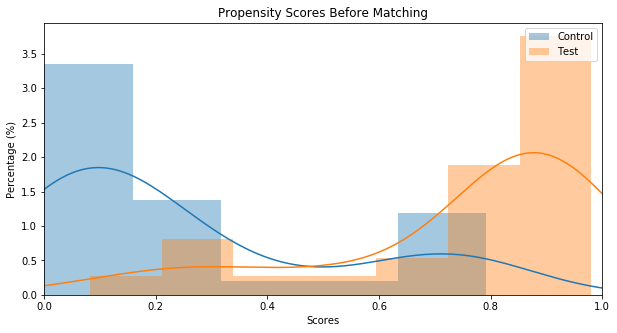

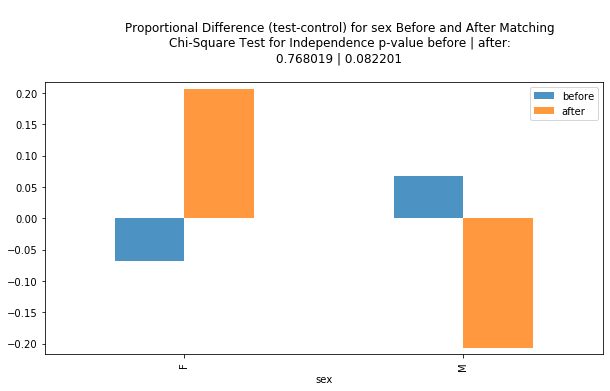

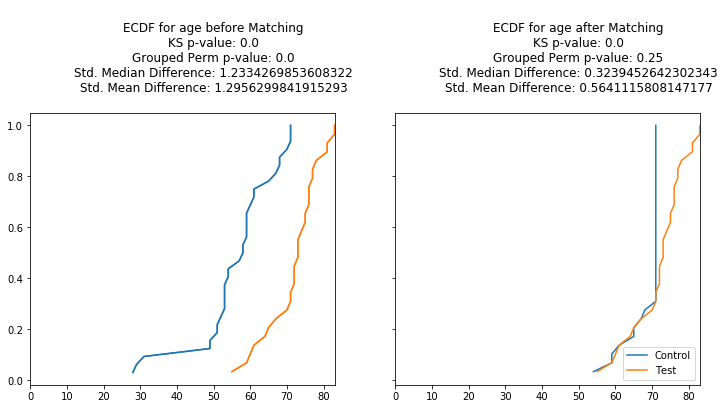

In [3]:
def psm_report(m):
    m.predict_scores()
    m.plot_scores()
    m.match(method="min", nmatches=1, threshold=0.0002, max_rand=10)
    m.assign_weight_vector()
    categorical_results = m.compare_categorical(return_table=True)
    cc = m.compare_continuous(return_table=True)
    print(m.record_frequency())
    print(categorical_results)
    print(cc)
    return m

print("ET-NC:")
m_et=psm_report(m_et)
et_psd = m_et.matched_data;

ET-NC(PSM-eTIV):
   freq  n_records
0     1         34
1     3          1
2    21          1
   var    before     after
0  sex  0.768019  0.180322
    var  ks_before  ks_after  grouped_chisqr_before  grouped_chisqr_after  \
0   age      0.000     0.000                  0.000                 0.267   
1  eTIV      0.649     0.003                  0.252                 0.000   

   std_median_diff_before  std_median_diff_after  std_mean_diff_before  \
0                1.233427               0.328946              1.295630   
1                0.190044              -0.052153              0.266504   

   std_mean_diff_after  
0             0.544462  
1             0.032050  


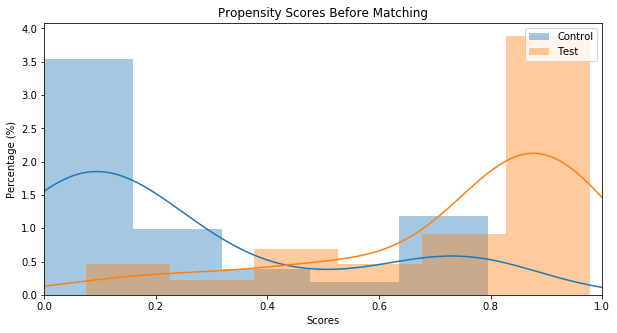

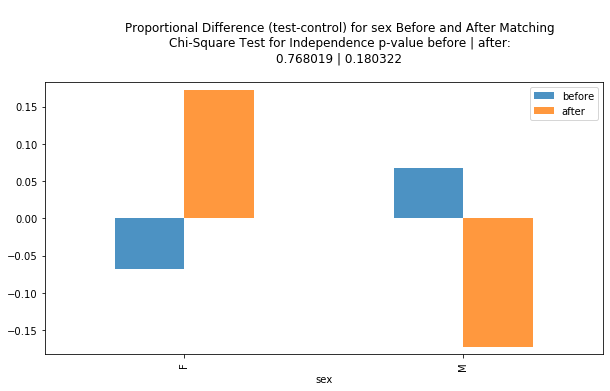

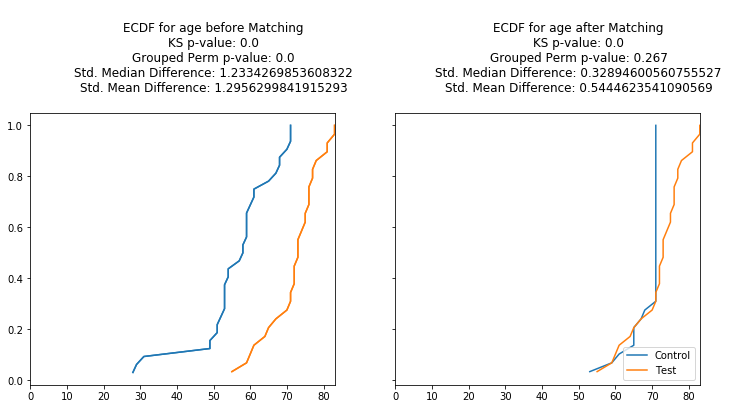

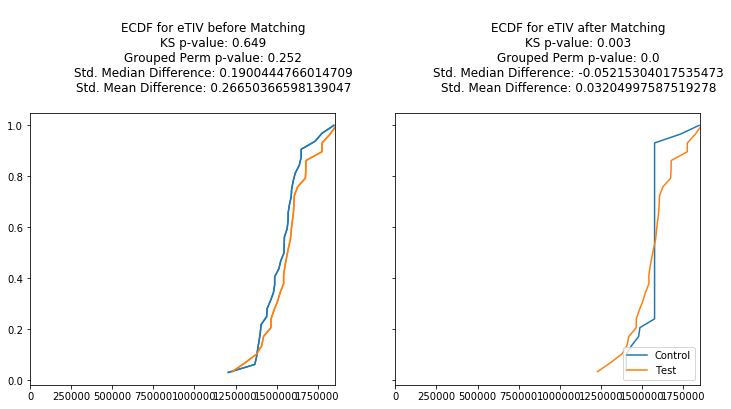

In [4]:
print("ET-NC(PSM-eTIV):")
m_et1=psm_report(m_et1)
et_psd1 = m_et1.matched_data;

PD-NC:
   freq  n_records
0     1         45
1     2          5
2     3          2
3     4          3
4     7          1
   var    before     after
0  sex  0.806496  0.652171
   var  ks_before  ks_after  grouped_chisqr_before  grouped_chisqr_after  \
0  age       0.02      0.63                   0.12                 0.494   

   std_median_diff_before  std_median_diff_after  std_mean_diff_before  \
0                0.442759               0.276323              0.375238   

   std_mean_diff_after  
0             0.020724  


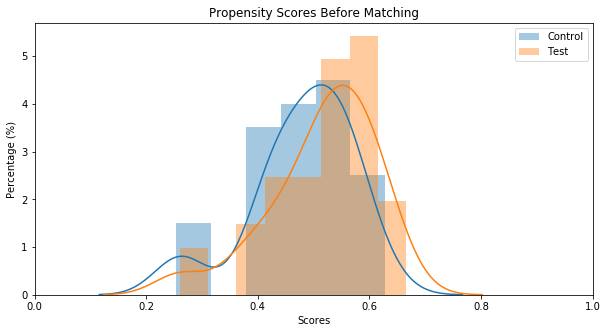

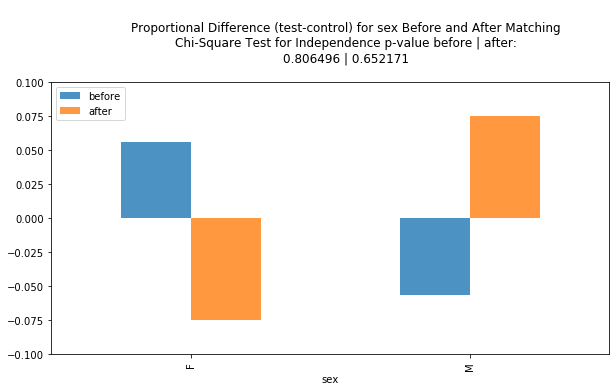

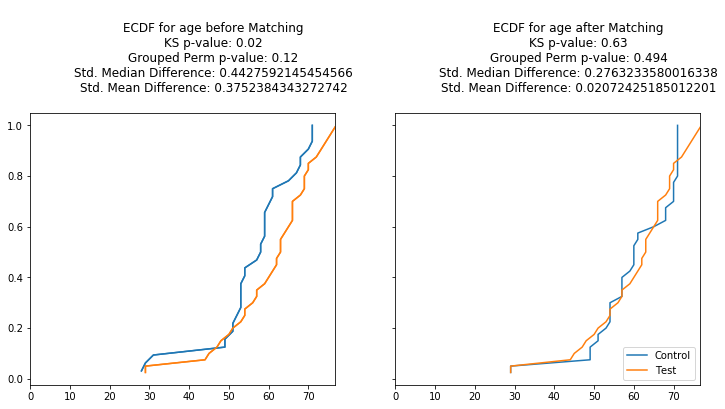

In [6]:
print("PD-NC:")
m_pd=psm_report(m_pd)
pd_psd = m_pd.matched_data;

PD-NC(PSM-eTIV):
   freq  n_records
0     1         49
1     2          4
2     3          3
3     4          1
4     5          2
   var    before     after
0  sex  0.806496  0.481924
    var  ks_before  ks_after  grouped_chisqr_before  grouped_chisqr_after  \
0   age      0.030     0.639                  0.130                 0.559   
1  eTIV      0.297     0.500                  0.129                 0.000   

   std_median_diff_before  std_median_diff_after  std_mean_diff_before  \
0                0.442759               0.188003              0.375238   
1               -0.483349              -0.276976             -0.119785   

   std_mean_diff_after  
0            -0.004700  
1            -0.070808  


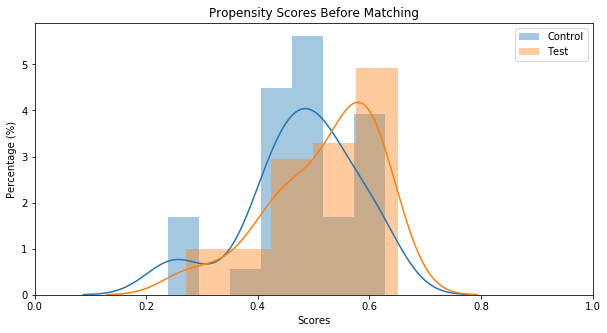

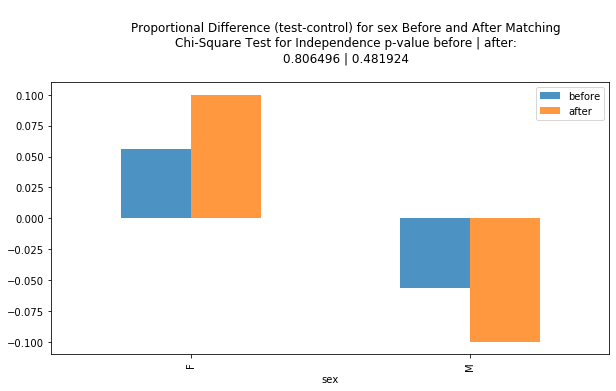

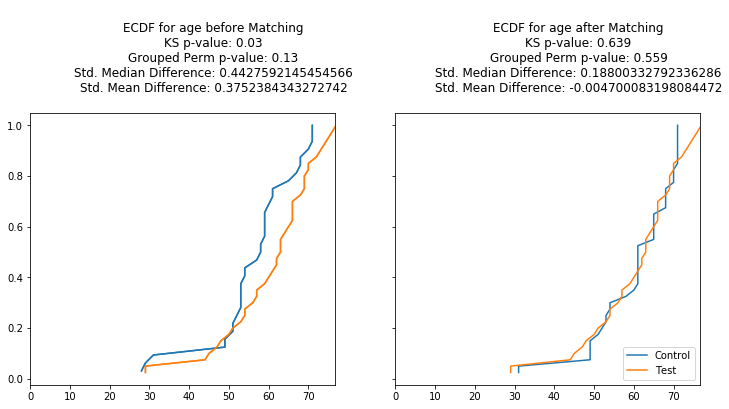

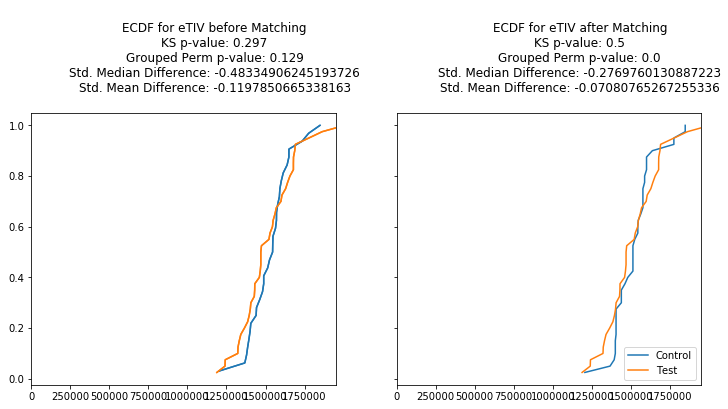

In [7]:
print("PD-NC(PSM-eTIV):")
m_pd1=psm_report(m_pd1)
pd_psd1 = m_pd1.matched_data;

PD-ET:
   freq  n_records
0     1         48
1     2          3
2     3          1
3     4          1
4     5          1
5    14          1
   var    before     after
0  sex  0.416425  0.262955
   var  ks_before  ks_after  grouped_chisqr_before  grouped_chisqr_after  \
0  age        0.0     0.059                    0.0                 0.006   

   std_median_diff_before  std_median_diff_after  std_mean_diff_before  \
0               -0.890132               0.259924              -1.02534   

   std_mean_diff_after  
0             -0.23913  


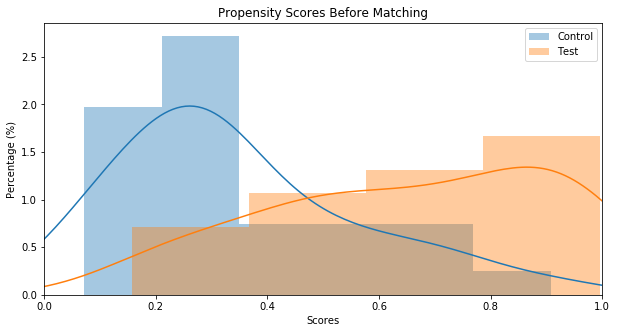

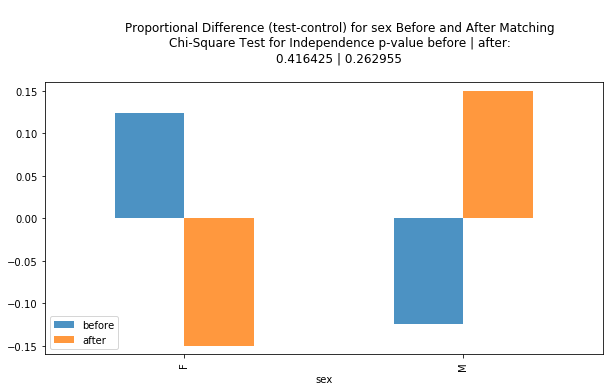

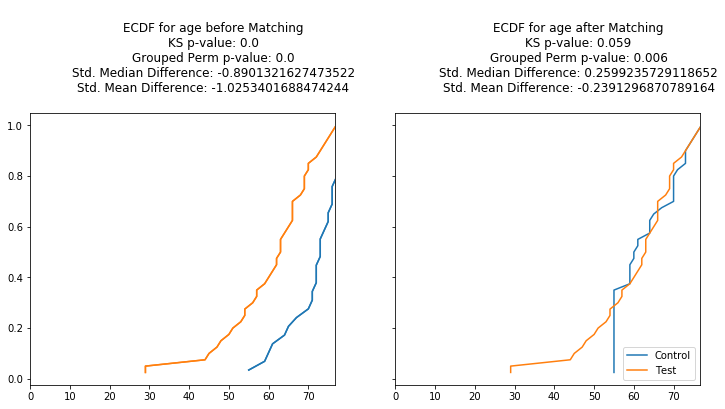

In [8]:
print("PD-ET:")
m_pdet=psm_report(m_pdet)
pdet_psd = m_pdet.matched_data;

PD-ET(PSM-eTIV):
   freq  n_records
0     1         44
1     2          5
2     3          2
3     7          1
4    13          1
   var    before     after
0  sex  0.416425  0.821073
    var  ks_before  ks_after  grouped_chisqr_before  grouped_chisqr_after  \
0   age      0.000     0.068                  0.000                 0.036   
1  eTIV      0.098     0.001                  0.136                 0.000   

   std_median_diff_before  std_median_diff_after  std_mean_diff_before  \
0               -0.890132               0.311538             -1.025340   
1               -0.619567              -0.527839             -0.338992   

   std_mean_diff_after  
0            -0.241442  
1            -0.295998  


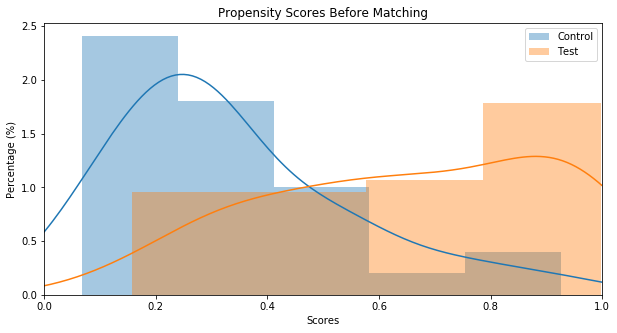

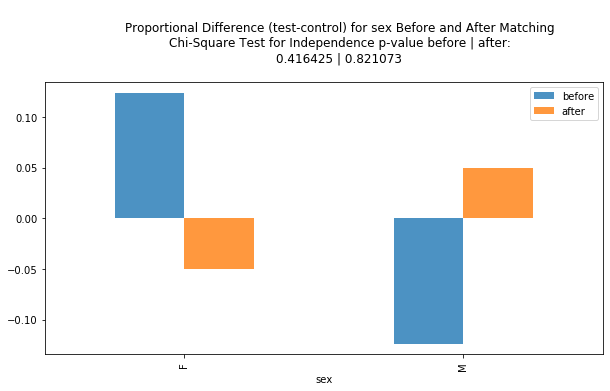

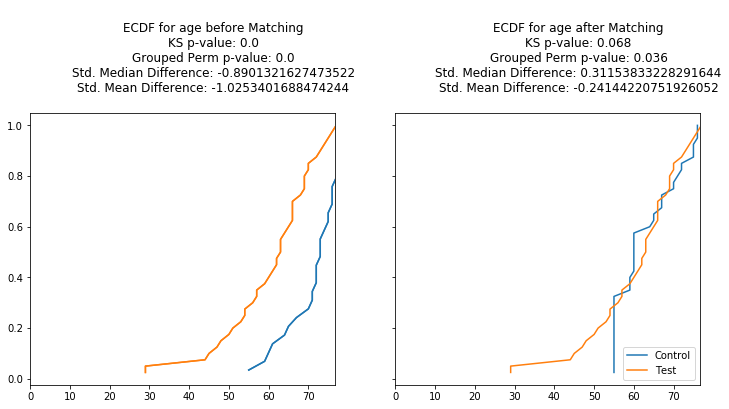

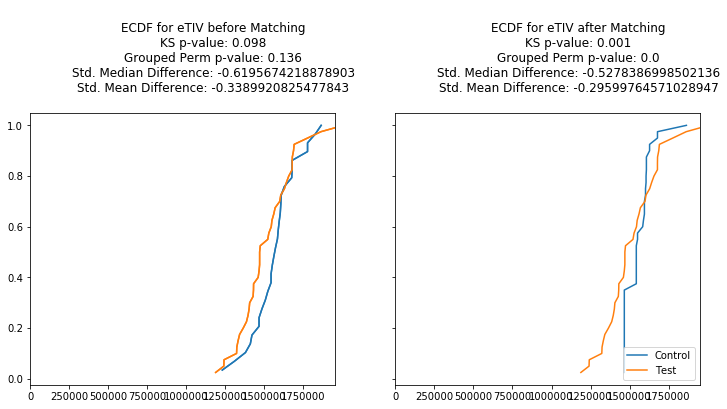

In [9]:
print("PD-ET(PSM-eTIV):")
m_pdet1=psm_report(m_pdet1)
pdet_psd1 = m_pdet1.matched_data;

In [12]:
pd_psd1[pd_psd1["is_PD"]==0].sub_id

40    sub_0041
41    sub_0041
42    sub_0041
43    sub_0041
44    sub_0041
45    sub_0053
46    sub_0057
47    sub_0057
48    sub_0058
49    sub_0060
50    sub_0062
51    sub_0062
52    sub_0066
53    sub_0072
54    sub_0077
55    sub_0085
56    sub_0104
57    sub_0104
58    sub_0107
59    sub_0108
60    sub_0108
61    sub_0108
62    sub_0110
63    sub_0110
64    sub_0113
65    sub_0113
66    sub_0113
67    sub_0117
68    sub_0117
69    sub_0117
70    sub_0121
71    sub_0121
72    sub_0121
73    sub_0121
74    sub_0121
75    sub_0124
76    sub_0130
77    sub_0130
78    sub_0130
79    sub_0130
Name: sub_id, dtype: object

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
def test_et_glm(data, feature_names, formula_com, groups, has_interaction):
    for x in feature_names:
        print("testing "+x)
        for i in range(len(data)):
            if has_interaction:
                y_name = '+eTIV*C(is_'+groups[i]+')'
            else:
                y_name = '+eTIV+C(is_'+groups[i]+')'

            print(groups[i],' :')
            m_form = x + formula_com + y_name ;
            m = glm(formula=m_form, data=data[i])
            res=m.fit(); print(res.summary2())
##
formula_com = ' ~ age+C(sex)'
GROUPS  = ['PD','ET','PD']
test_et_glm([pd_psd, et_psd, pdet_psd], x_focus[1:-1], formula_com , GROUPS, 0)
#test_et_glm([pd_psd, et_psd, pdet_psd], x_focus[1:2], formula_com , GROUPS, 1)
#test_et_glm([pd_psd1, et_psd1, pdet_psd1], x_focus[1:-1], formula_com , GROUPS, 0)
#test_et_glm([pd_psd1, et_psd1, pdet_psd1], x_focus[1:], formula_com , GROUPS, 1)

testing TotalGrayVol
PD  :
                     Results: Generalized linear model
Model:                GLM                AIC:              1876.6244       
Link Function:        identity           BIC:              63668406585.0057
Dependent Variable:   TotalGrayVol       Log-Likelihood:   -933.31         
Date:                 2020-11-27 13:40   LL-Null:          -1036.0         
No. Observations:     80                 Deviance:         6.3668e+10      
Df Model:             4                  Pearson chi2:     6.37e+10        
Df Residuals:         75                 Scale:            8.4891e+08      
Method:               IRLS                                                 
---------------------------------------------------------------------------
                 Coef.     Std.Err.     z    P>|z|     [0.025      0.975]  
---------------------------------------------------------------------------
Intercept     244900.9656 42423.9742  5.7727 0.0000 161751.5042 328050.4271
C(sex)

In [31]:
i_feature = x_focus[1]; 
i=0;
formula_com = ' ~ age+C(sex)*eTIV';
y_name = '+C(is_'+GROUPS[i]+')'
m_form = i_feature+ formula_com + y_name ;
m = glm(formula=m_form, data=pd_psd1)
res=m.fit(); print(res.summary2())
##
GROUPS  = ['PD','ET','PD']
#test_et_glm([pd_psd, et_psd, pdet_psd], x_focus[1:2], formula_com , GROUPS, 0)

                       Results: Generalized linear model
Model:                  GLM                 AIC:               1856.3351       
Link Function:          identity            BIC:               48186218787.5629
Dependent Variable:     TotalGrayVol        Log-Likelihood:    -922.17         
Date:                   2020-11-27 05:59    LL-Null:           -1112.3         
No. Observations:       80                  Deviance:          4.8186e+10      
Df Model:               5                   Pearson chi2:      4.82e+10        
Df Residuals:           74                  Scale:             6.5117e+08      
Method:                 IRLS                                                   
-------------------------------------------------------------------------------
                    Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
-------------------------------------------------------------------------------
Intercept        219260.6758 77131.4669  2.8427 0.0045   68085.

In [54]:
from causalinference import CausalModel
from causalinference.utils import random_data
Y, D, X = random_data()
causal = CausalModel(Y, D, X)

In [58]:
print(causal.summary_stats)


Summary Statistics

                      Controls (N_c=2484)        Treated (N_t=2516)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y       -0.972        1.755        4.986        2.952        5.958

                      Controls (N_c=2484)        Treated (N_t=2516)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       -0.291        0.971        0.322        0.940        0.642
             X1       -0.357        0.945        0.356        0.930        0.761
             X2       -0.341        0.946        0.323        0.933        0.707



In [59]:
from math import exp, log

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.special import expit

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline 

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize'] = 10, 8

np.seterr(divide='ignore', invalid='ignore')
np.random.seed(42)

/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


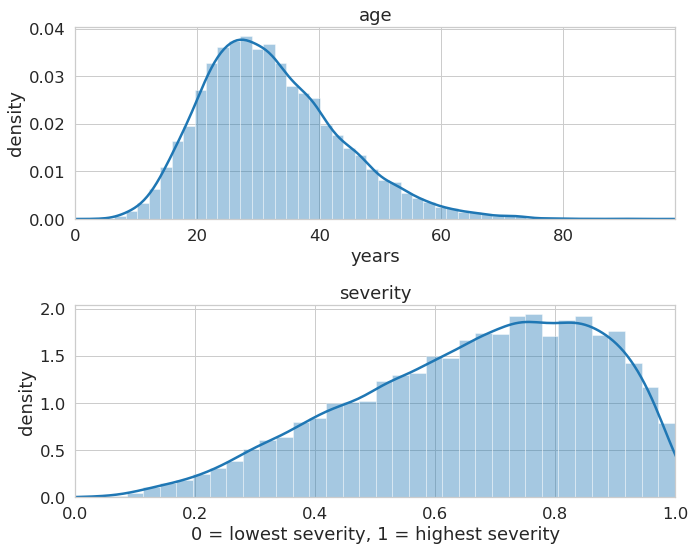

In [60]:
def exp_recovery_time(sex, age, severity, medication):
    return exp(2+0.5*sex+0.03*age+2*severity-1*medication)

def rvs_recovery_time(sex, age, severity, medication, *args):
    return stats.poisson.rvs(exp_recovery_time(sex, age, severity, medication))
N = 10000  # number of observations, i.e. patients
sexes = np.random.randint(0, 2, size=N)  # sex == 1 if male otherwise female
ages_dist = stats.gamma(8, scale=4)
ages = ages_dist.rvs(size=N)
sev_dist = stats.beta(3, 1.5)
severties = sev_dist.rvs(size=N)
f, (ax1, ax2) = plt.subplots(2)
ax1.set_title('age')
ax1.set_xlabel('years')
ax1.set_ylabel('density')
ax1.set_xlim(0, np.max(ages))
ax2.set_title('severity')
ax2.set_xlabel('0 = lowest severity, 1 = highest severity')
ax2.set_ylabel('density')
ax2.set_xlim(0, 1)
sns.distplot(ages, ax=ax1)
sns.distplot(severties, ax=ax2)
plt.tight_layout();

In [61]:
meds = np.random.randint(0, 2, size=N)
const = np.ones(N)
df_rnd = pd.DataFrame(dict(sex=sexes, age=ages, severity=severties, medication=meds, const=const))
features = ['sex', 'age', 'severity', 'medication', 'const']
df_rnd = df_rnd[features] # to enforce column order
df_rnd['recovery'] = df_rnd.apply(lambda x: rvs_recovery_time(*x) , axis=1)
df_rnd.head()

,sex,age,severity,medication,const,recovery
0,0,24.518667,0.858950,1,1.0,34
1,1,11.080205,0.905123,0,1.0,97
2,0,37.014895,0.601475,0,1.0,77
3,0,35.657701,0.749840,1,1.0,39
4,0,36.735167,0.385460,1,1.0,18


In [62]:
df_rnd.describe()

,sex,age,severity,medication,const,recovery
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,0.498700,32.160968,0.666299,0.497400,1.0,76.085700
std,0.500023,11.243333,0.201010,0.500018,0.0,63.304659
min,0.000000,4.508904,0.029818,0.000000,1.0,0.000000
25%,0.000000,24.044093,0.525905,0.000000,1.0,33.000000
50%,0.000000,30.760101,0.693532,0.000000,1.0,57.000000
75%,1.000000,38.922208,0.829290,1.000000,1.0,99.000000
max,1.000000,98.330906,0.999327,1.000000,1.0,805.000000


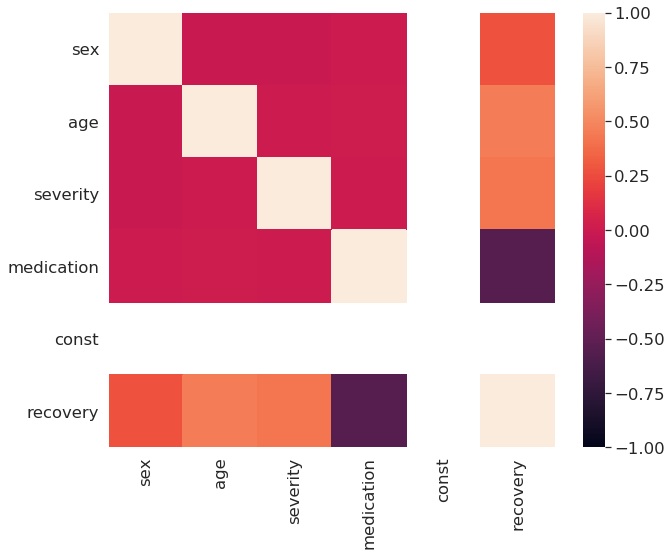

In [63]:
sns.heatmap(df_rnd.corr(), vmin=-1, vmax=1);

In [64]:
glm = sm.GLM(df_rnd['recovery'], df_rnd[features], family=sm.families.Poisson())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               recovery   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9995
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34429.
Date:                Thu, 26 Nov 2020   Deviance:                       10080.
Time:                        01:25:15   Pearson chi2:                 1.00e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            0.4994      0.002    211.934      0.000       0.495       0.504
age            0.0301   8.95e-05    335.807      0.000       0.030       0.030
severity       2.0000      0.006    309.610      0.000       1.987       2.013
medication    -1.0024      0.003   -387.721      0.000      -1.007      -0.997
const          1.9990      0.006    326.234      0.000       1.987       2.011
==============================================================================
"""

In [65]:
reg = RandomForestRegressor()
X = df_rnd[features].as_matrix()
y = df_rnd['recovery'].values
reg.fit(X, y)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


RandomForestRegressor()

In [66]:
X_neg = np.copy(X)
# set the medication column to 0
X_neg[:, df_rnd.columns.get_loc('medication')] = 0
X_pos = np.copy(X)
# set the medication column to 1
X_pos[:, df_rnd.columns.get_loc('medication')] = 1
preds_rnd = reg.predict(X_pos) / reg.predict(X_neg)

/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


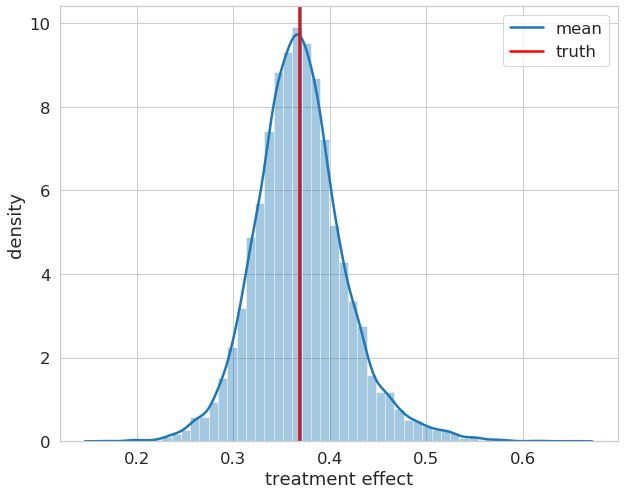

In [67]:
ax = sns.distplot(preds_rnd)
ax.set_xlabel('treatment effect')
ax.set_ylabel('density')
plt.axvline(np.mean(preds_rnd), label='mean')
plt.axvline(np.exp(-1), color='r', label='truth')
plt.legend();

In [68]:
def get_medication(sex, age, severity, medication, *args):
    return int(1/3*sex + 2/3*severity + 0.15*np.random.randn() > 0.8)

df_obs = df_rnd.copy().drop('recovery', axis=1)
df_obs['medication'] = df_obs.apply(lambda x: get_medication(*x), axis=1)
df_obs['recovery'] = df_obs.apply(lambda x: rvs_recovery_time(*x), axis=1)
df_obs.describe()

,sex,age,severity,medication,const,recovery
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,0.498700,32.160968,0.666299,0.251500,1.0,85.452800
std,0.500023,11.243333,0.201010,0.433897,0.0,53.415154
min,0.000000,4.508904,0.029818,0.000000,1.0,8.000000
25%,0.000000,24.044093,0.525905,0.000000,1.0,49.000000
50%,0.000000,30.760101,0.693532,0.000000,1.0,72.000000
75%,1.000000,38.922208,0.829290,1.000000,1.0,106.000000
max,1.000000,98.330906,0.999327,1.000000,1.0,740.000000


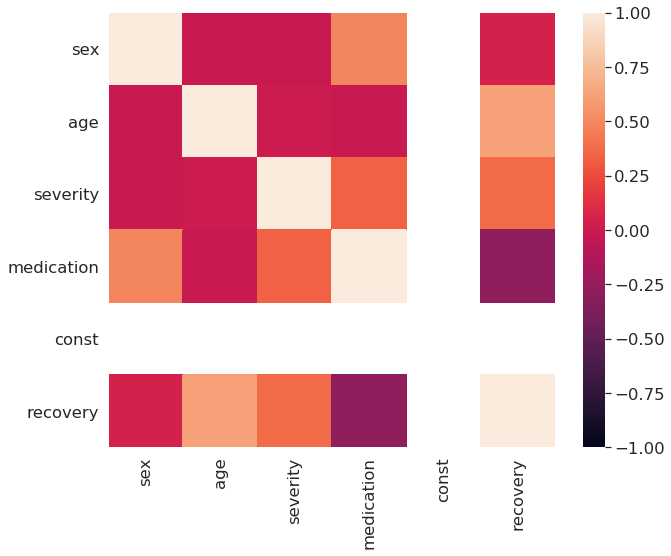

In [69]:
sns.heatmap(df_obs.corr(), vmin=-1, vmax=1);


In [70]:
glm = sm.GLM(df_obs['recovery'], df_obs[features], family=sm.families.Poisson())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               recovery   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9995
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35694.
Date:                Thu, 26 Nov 2020   Deviance:                       10122.
Time:                        01:32:03   Pearson chi2:                 1.01e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            0.5012      0.002    205.202      0.000       0.496       0.506
age            0.0300   8.48e-05    354.112      0.000       0.030       0.030
severity       2.0081      0.006    318.997      0.000       1.996       2.020
medication    -1.0042      0.003   -304.851      0.000      -1.011      -0.998
const          1.9930      0.006    345.271      0.000       1.982       2.004
==============================================================================
"""

In [71]:
reg = RandomForestRegressor()
X = df_obs[features].as_matrix()
y = df_obs['recovery'].values
reg.fit(X, y)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


RandomForestRegressor()

/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


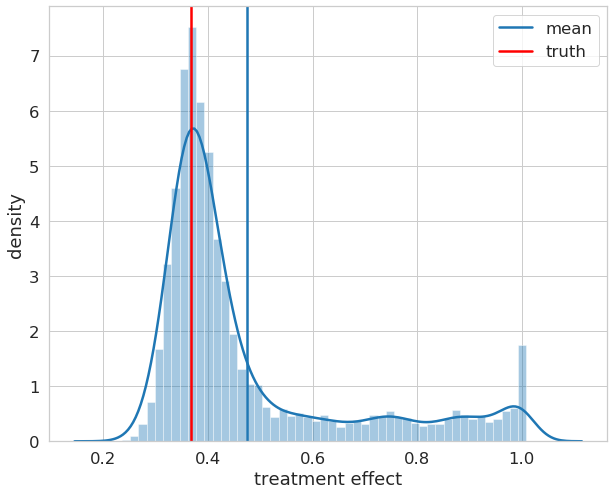

In [72]:
X_neg = np.copy(X)
X_neg[:, df_obs.columns.get_loc('medication')] = 0
X_pos = np.copy(X)
X_pos[:, df_obs.columns.get_loc('medication')] = 1
preds_no_rnd = reg.predict(X_pos) / reg.predict(X_neg)
ax = sns.distplot(preds_no_rnd)
ax.set_xlabel('treatment effect')
ax.set_ylabel('density')
plt.axvline(np.mean(preds_no_rnd), label='mean')
plt.axvline(np.exp(-1), color='r', label='truth')
plt.legend();


In [73]:
# classifier to estimate the propensity score
cls = LogisticRegression(random_state=42)
#cls = GaussianNB()  # another possible propensity score estimator

# calibration of the classifier
cls = CalibratedClassifierCV(cls)

X = df_obs[features].drop(['medication'], axis=1).as_matrix()
y = df_obs['medication'].values
cls.fit(X, y)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=42))

In [74]:
propensity = pd.DataFrame(cls.predict_proba(X))
propensity.head()

,0,1
0,0.936324,0.063676
1,0.184574,0.815426
2,0.989453,0.010547
3,0.969842,0.030158
4,0.997762,0.002238


/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


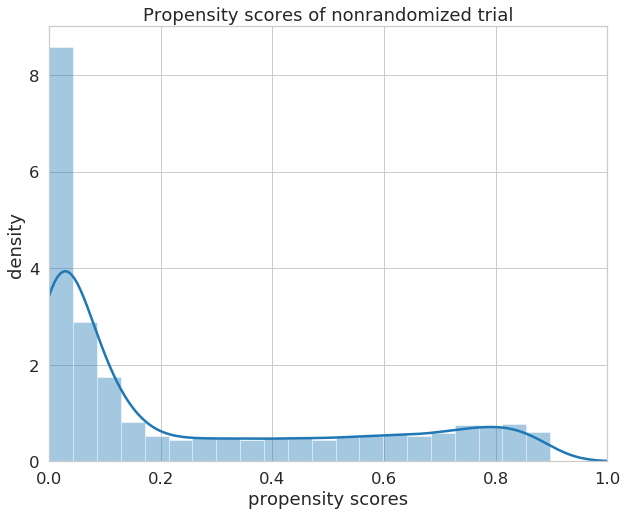

In [75]:
ax = sns.distplot(propensity[1].values)
ax.set_xlim(0, 1)
ax.set_title("Propensity scores of nonrandomized trial")
ax.set_xlabel("propensity scores")
ax.set_ylabel('density');

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


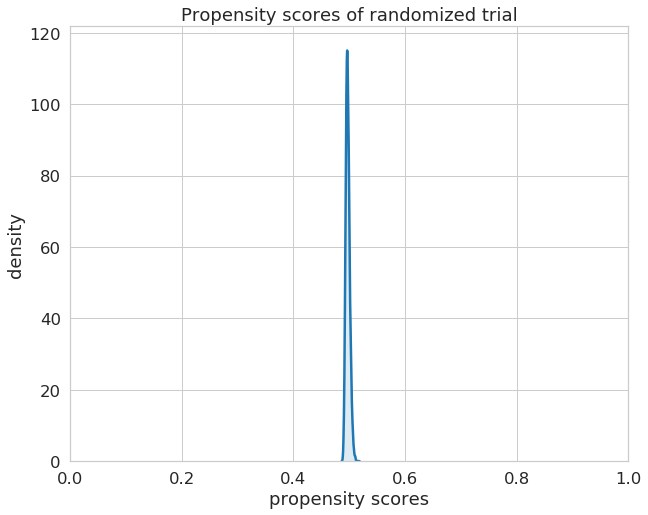

In [76]:
X = df_rnd[features].drop(['medication'], axis=1).as_matrix()
y = df_rnd['medication'].values
cls.fit(X, y)
ax = sns.distplot(cls.predict_proba(X)[:,1]);
ax.set_xlim(0, 1)
ax.set_title("Propensity scores of randomized trial")
ax.set_xlabel("propensity scores")
ax.set_ylabel('density');

In [77]:
# DataFrame's lookup method extracts the column index 
# provided by df2['medication'] for each row
df_obs['iptw'] = 1. / propensity.lookup(
   np.arange(propensity.shape[0]), df_obs['medication'])

df_obs.describe()

,sex,age,severity,medication,const,recovery,iptw
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000
mean,0.498700,32.160968,0.666299,0.251500,1.0,85.452800,1.827497
std,0.500023,11.243333,0.201010,0.433897,0.0,53.415154,3.467587
min,0.000000,4.508904,0.029818,0.000000,1.0,8.000000,1.000172
25%,0.000000,24.044093,0.525905,0.000000,1.0,49.000000,1.020585
50%,0.000000,30.760101,0.693532,0.000000,1.0,72.000000,1.106766
75%,1.000000,38.922208,0.829290,1.000000,1.0,106.000000,1.489115
max,1.000000,98.330906,0.999327,1.000000,1.0,740.000000,112.741892


In [78]:
glm = sm.GLM(df_obs['recovery'], df_obs[features], 
             family=sm.families.Poisson(),
             freq_weights=df_obs['iptw'])
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               recovery   No. Observations:                10000
Model:                            GLM   Df Residuals:                 18269.97
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63962.
Date:                Thu, 26 Nov 2020   Deviance:                       18307.
Time:                        01:33:32   Pearson chi2:                 1.83e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            0.4954      0.002    291.513      0.000       0.492       0.499
age            0.0300   6.52e-05    459.380      0.000       0.030       0.030
severity       2.0012      0.005    422.683      0.000       1.992       2.010
medication    -0.9953      0.002   -525.516      0.000      -0.999      -0.992
const          2.0048      0.005    444.055      0.000       1.996       2.014
==============================================================================
"""

In [79]:
reg = RandomForestRegressor(random_state=42)
X = df_obs[features].as_matrix()
y = df_obs['recovery'].values
reg.fit(X, y, sample_weight=df_obs['iptw'].values)

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


RandomForestRegressor(random_state=42)

/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


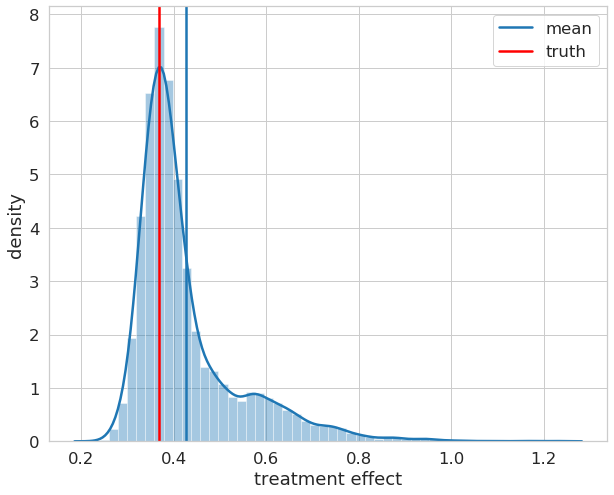

In [80]:
X_neg = np.copy(X)
X_neg[:, df_obs.columns.get_loc('medication')] = 0
X_pos = np.copy(X)
X_pos[:, df_obs.columns.get_loc('medication')] = 1

preds_propensity = reg.predict(X_pos) / reg.predict(X_neg)

ax = sns.distplot(preds_propensity)
ax.set_xlabel('treatment effect')
ax.set_ylabel('density')
plt.axvline(np.mean(preds_propensity), label='mean')
plt.axvline(np.exp(-1), color='r', label='truth')
plt.legend();

/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/miniconda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

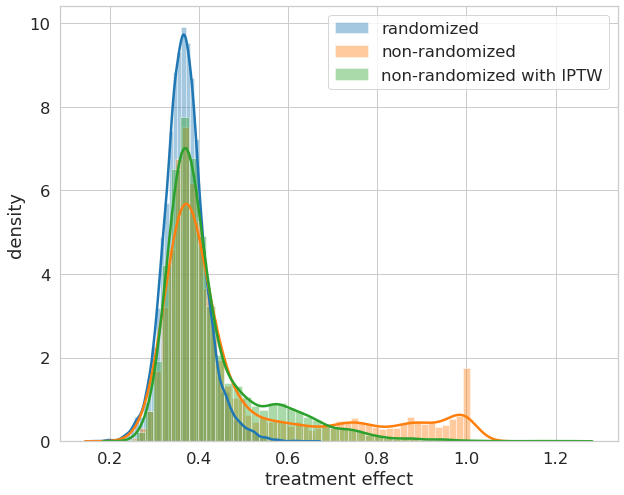

In [81]:
sns.distplot(preds_rnd, label='randomized')
sns.distplot(preds_no_rnd, label='non-randomized')
ax = sns.distplot(preds_propensity, label='non-randomized with IPTW')
ax.set_xlabel('treatment effect')
ax.set_ylabel('density')
plt.legend();

In [82]:
def weighted_corr(m, w=None):
    if w is None:
        w = np.ones(m.shape[0])
    cov = np.cov(m, rowvar=False, aweights=w, ddof=0)
    sigma = np.sqrt(np.diag(cov))
    return cov / np.outer(sigma, sigma)

In [83]:
sel_cols = [col for col in df_obs.columns if col != 'iptw']
orig_corr = weighted_corr(df_obs[sel_cols].as_matrix(), w=np.ones(df_obs.shape[0]))
orig_corr = pd.DataFrame(orig_corr, index=sel_cols, columns=sel_cols)
orig_corr

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,sex,age,severity,medication,const,recovery
sex,1.000000,-0.013332,-0.012855,0.498195,NaN,0.053976
age,-0.013332,1.000000,0.005086,-0.008558,NaN,0.618247
severity,-0.012855,0.005086,1.000000,0.341631,NaN,0.380937
medication,0.498195,-0.008558,0.341631,1.000000,NaN,-0.279515
const,NaN,NaN,NaN,NaN,NaN,NaN
recovery,0.053976,0.618247,0.380937,-0.279515,NaN,1.000000


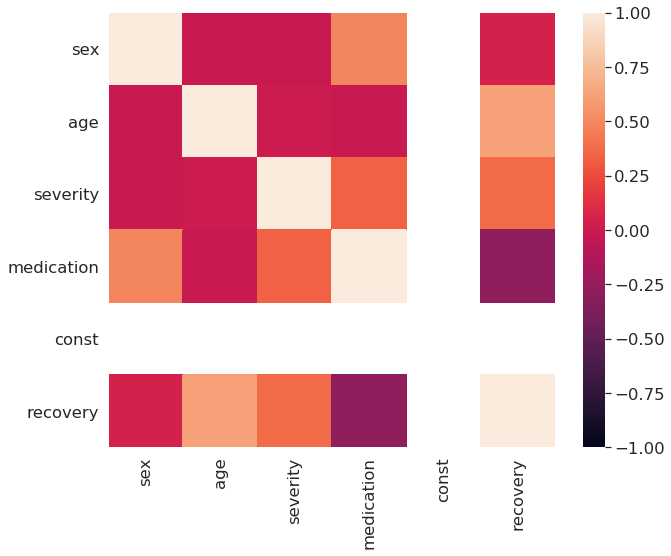

In [84]:
sns.heatmap(orig_corr, vmin=-1, vmax=1);

In [85]:
iptw_corr = weighted_corr(df_obs[sel_cols].as_matrix(), w=df_obs['iptw'].values)
iptw_corr = pd.DataFrame(iptw_corr, index=sel_cols, columns=sel_cols)
iptw_corr

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,sex,age,severity,medication,const,recovery
sex,1.000000,0.013200,-0.125939,0.087773,NaN,0.233614
age,0.013200,1.000000,-0.009632,-0.021493,NaN,0.499653
severity,-0.125939,-0.009632,1.000000,0.149110,NaN,0.357109
medication,0.087773,-0.021493,0.149110,1.000000,NaN,-0.516542
const,NaN,NaN,NaN,NaN,NaN,NaN
recovery,0.233614,0.499653,0.357109,-0.516542,NaN,1.000000


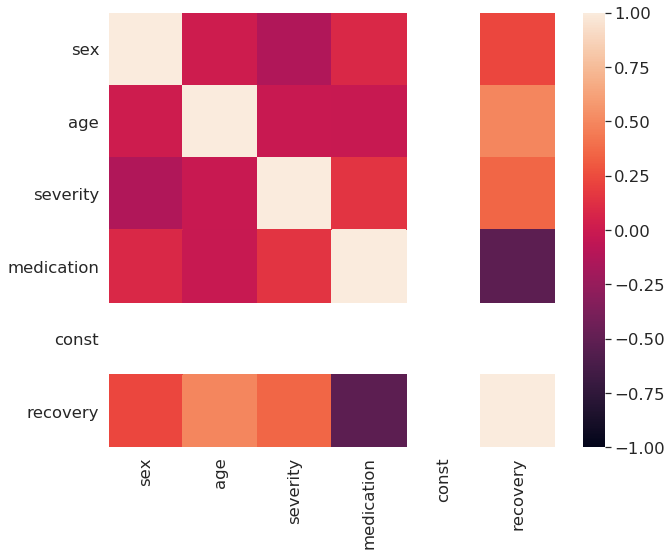

In [86]:
sns.heatmap(iptw_corr, vmin=-1, vmax=1);
